## $\color{teal}{\text{Importing Libraries}}$ 

In [152]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import spacy
import nltk
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [154]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [155]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [156]:
import os
import numpy as np
import plotly.express as px
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## $\color{teal}{\text{Loading the dataset}}$ 

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
url = '/content/drive/MyDrive/realdonaldtrump.csv'
tweets = pd.read_csv(url)

## $\color{teal}{\text{Analyzing the dataset}}$ 

In [159]:
#checking if it's a dataframe
type(tweets)

pandas.core.frame.DataFrame

In [160]:
# dropping the columns which are not required
tweets = tweets.drop(["id","link"], axis = 1)

In [161]:
tweets.info()#to view the data type, number of rows and columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43352 entries, 0 to 43351
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    43352 non-null  object
 1   date       43352 non-null  object
 2   retweets   43352 non-null  int64 
 3   favorites  43352 non-null  int64 
 4   mentions   20386 non-null  object
 5   hashtags   5583 non-null   object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [177]:
#converting the date column to date format
tweets["date"] = pd.to_datetime(tweets["date"])
tweets["date"].apply(lambda x: x.year)
tweets["year_month"] = tweets["date"].apply(lambda x: str(x.year)+"-"+str(x.month))
tweets["year_month"] = pd.to_datetime(tweets["year_month"])
year_month = pd.pivot_table(tweets, values = "content", index = "year_month", aggfunc = "count")
tweets.head()

,content,date,retweets,favorites,mentions,hashtags,year_month
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 13:54:25,510,917,NaN,NaN,2009-05-01
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-04 20:00:10,34,267,NaN,NaN,2009-05-01
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08 08:38:08,13,19,NaN,NaN,2009-05-01
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08 15:40:15,11,26,NaN,NaN,2009-05-01
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12 09:07:28,1375,1945,NaN,NaN,2009-05-01


In [132]:
# Number of tweets 
tweets["year_month"] = tweets["date"].apply(lambda x: str(x.year)+"-"+str(x.month))
tweets["year_month"] = pd.to_datetime(tweets["year_month"])

In [133]:
tweets

,content,date,retweets,favorites,mentions,hashtags,polarity,pos,neg,compound,year_month
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04,510,917,NaN,NaN,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.5255}",0.173,0.000,0.5255,2009-05-01
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,2009-05-04,34,267,NaN,NaN,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.7712}",0.260,0.000,0.7712,2009-05-01
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,2009-05-08,13,19,NaN,NaN,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.6468}",0.274,0.000,0.6468,2009-05-01
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,2009-05-08,11,26,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,0.000,0.0000,2009-05-01
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",2009-05-12,1375,1945,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,0.000,0.0000,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. He “bungled” everything that he touched!,2020-06-17,23402,116377,NaN,NaN,"{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.6514}",0.000,0.265,-0.6514,2020-06-01
43348,Will be interviewed on @ seanhannity tonight at 9:00 P.M. Enjoy!,2020-06-17,11810,56659,@seanhannity,NaN,"{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.5411}",0.280,0.000,0.5411,2020-06-01
43349,pic.twitter.com/3lm1spbU8X,2020-06-17,4959,19344,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,0.000,0.0000,2020-06-01
43350,pic.twitter.com/vpCE5MadUz,2020-06-17,4627,17022,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,0.000,0.0000,2020-06-01


In [134]:
tweets.isnull().sum()#checking if there are any null values and its count

content           0
date              0
retweets          0
favorites         0
mentions      22966
hashtags      37769
polarity          0
pos               0
neg               0
compound          0
year_month        0
dtype: int64

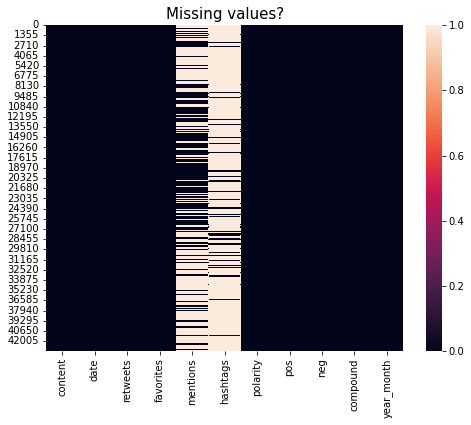

In [135]:
plt.figure(figsize=(8,6))
sns.heatmap(tweets.isnull())
plt.title("Missing values?", fontsize = 15)
plt.show()

## $\color{teal}{\text{Analyzing the tweet timeline}}$ 

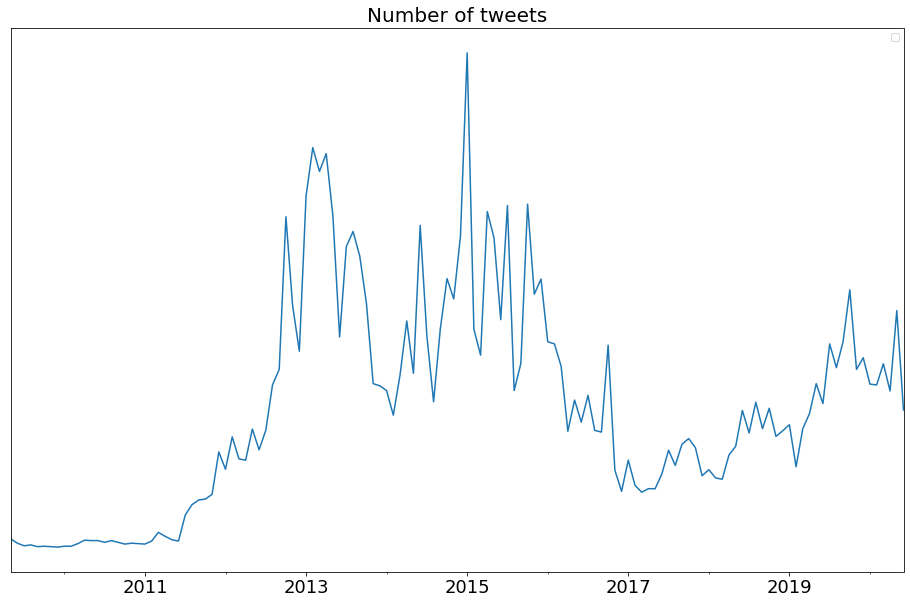

In [110]:
#checking when was the number of tweets highest
tweets["year_month"] = tweets["date"].apply(lambda x: str(x.year)+"-"+str(x.month))
tweets["year_month"] = pd.to_datetime(tweets["year_month"])
year_month = pd.pivot_table(tweets, values = "content", index = "year_month", aggfunc = "count")

bar = year_month.plot(figsize = (16,10))
plt.title("Number of tweets", fontsize=20)
plt.axvline(8, 0 ,1, color = "grey", lw = 3)
bar.tick_params(labelsize=18)
plt.legend("")
plt.xlabel("")
bar.get_yaxis().set_visible(False)
plt.show()

In [ ]:
!pip install neattext
import neattext as ntx
pd.set_option('display.max_colwidth', 700)
print(tweets.head())
tweets['clean_data'] = tweets['content'].apply(ntx.remove_hashtags)
tweets['clean_data'] = tweets['clean_data'].apply(ntx.remove_urls)
tweets['clean_data'] = tweets['clean_data'].apply(ntx.remove_special_characters)
tweets['clean_data'] = tweets['clean_data'].apply(ntx.remove_userhandles)
tweets['clean_data'] = tweets['clean_data'].apply(ntx.remove_multiple_spaces)
tweets[['clean_data', 'content']].head()

In [112]:
# NLTK has been used to remove stop words inorder to assign subjectivity and polarity to the tweets by TextBlob, so importing the neccessary libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

In [113]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')
# The Polarity of the tweet will not change because of stop words so removing the stopwords
stop_words = stopwords.words('english')
len(stop_words), stop_words[5:10]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [114]:
# The below function is used to remove the stop words from tweet
def Stop_word_removal(tweet):
    tweet_without_stopW = tweet
    tweet_without_stopW = " ".join(x for x in tweet_without_stopW.split() if x not in stop_words)
    return tweet_without_stopW


tweets['clean_data'] = tweets['clean_data'].apply(lambda x: Stop_word_removal(x))
tweets.head(2)
print("Printing the Tweet without stopword")
print(tweets['clean_data'])

Printing the Tweet without stopword
0                            Be sure tune watch Donald Trump Late Night David Letterman presents Top Ten List tonight
1        Donald Trump appearing The View tomorrow morning discuss Celebrity Apprentice new book Think Like A Champion
2                                      Donald Trump reads Top Ten Financial Tips Late Show David Letterman Very funny
3                                                 New Blog Post Celebrity Apprentice Finale Lessons Learned Along Way
4                                              My persona never wallflower Id rather build walls cling Donald J Trump
                                                             ...                                                     
43347                                                Joe Biden TOTAL FAILURE Government He bungled everything touched
43348                                                               Will interviewed seanhannity tonight 900 PM Enjoy
43349               

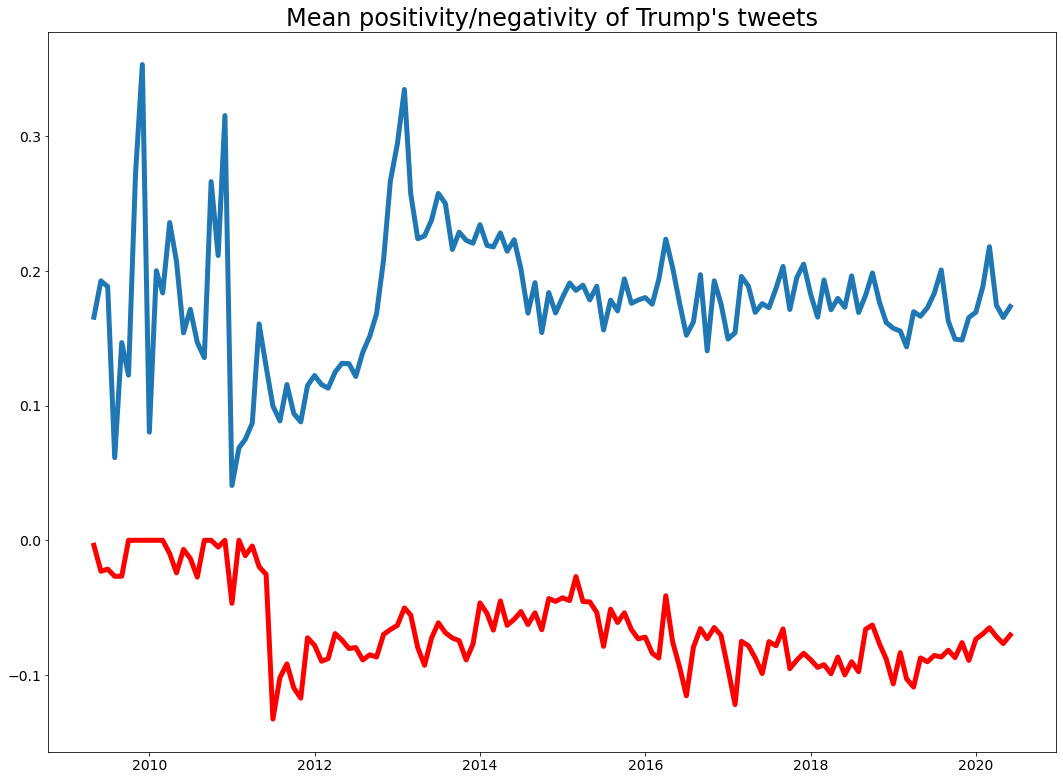

In [204]:
# Calculate the polarity of the tweets of Trump with NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

tweets["polarity"] = tweets["content"].apply(lambda x: sentiment.polarity_scores(x))

tweets["pos"] = tweets["polarity"].apply(lambda x: x["pos"])
tweets["neg"] = tweets["polarity"].apply(lambda x: x["neg"])
tweets["compound"] = tweets["polarity"].apply(lambda x: x["compound"])

# Create the visualization
fig = plt.figure(figsize = (14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean positivity/negativity of Trump's tweets", fontsize=24)
ax.tick_params(labelsize=14)

# Positivity plot
year_month = pd.pivot_table(tweets, values = "pos", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5)

# Negativity plot
year_month = pd.pivot_table(tweets, values = "neg", index = "year_month", aggfunc = "mean").apply(lambda x: -x)
ax.plot(year_month, lw = 5, color = "red")
plt.show()

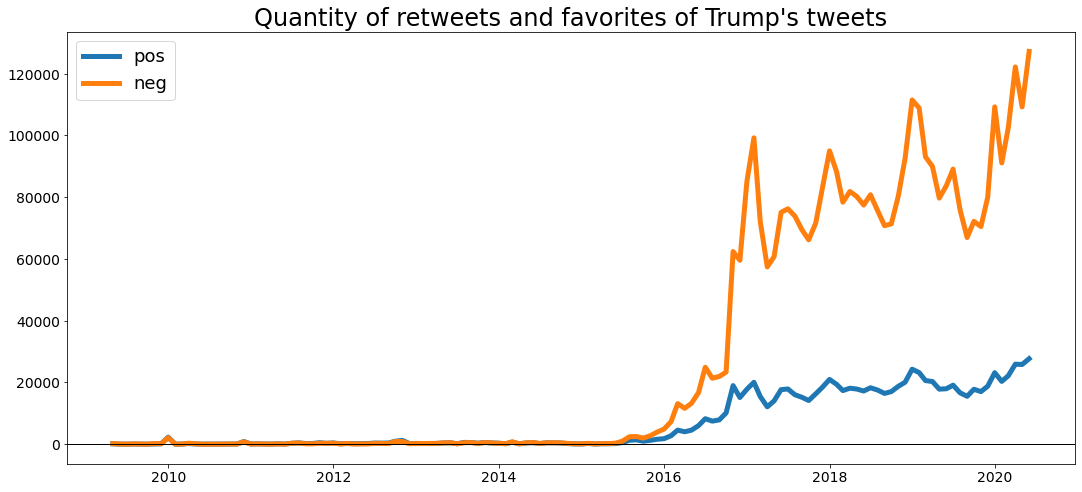

In [202]:

# Create the visualization
fig = plt.figure(figsize = (14,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Quantity of retweets and favorites of Trump's tweets", fontsize=24)
ax.tick_params(labelsize=14)


# Monthly Average number of "retweets"
year_month = pd.pivot_table(tweets, values = "retweets", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5)

# Monthly Average number of "favorites"
year_month = pd.pivot_table(tweets, values = "favorites", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5)

# Add the "president" and "corona" lines
ax.legend(["pos","neg"], fontsize=18)
plt.axhline(0, 0 ,1, color = "black", lw = 1)



plt.show()



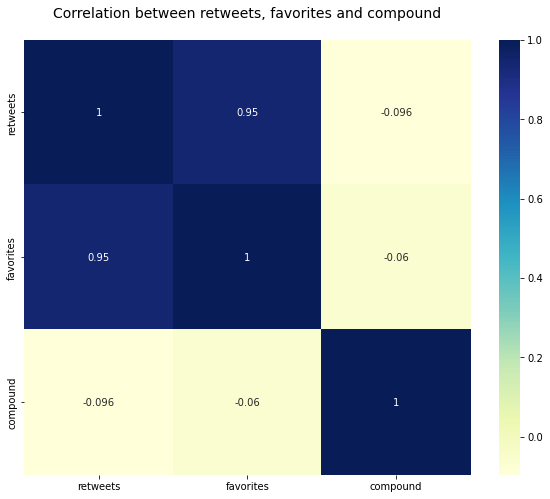

In [190]:
plt.figure(figsize = (10,8))
sns.heatmap(tweets[["retweets","favorites", "compound"]].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation between retweets, favorites and compound\n", fontsize = 14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


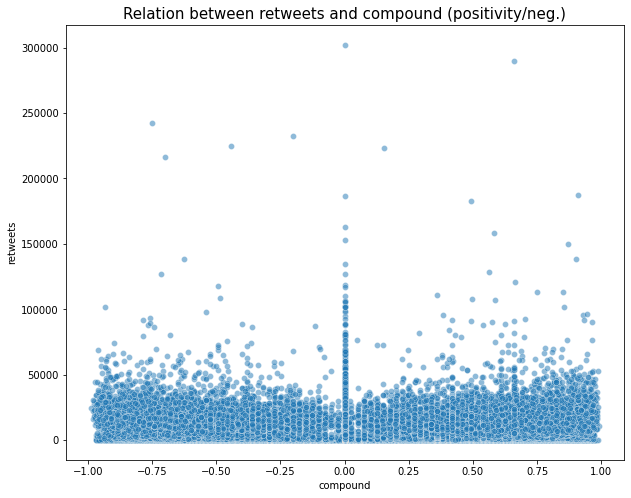

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


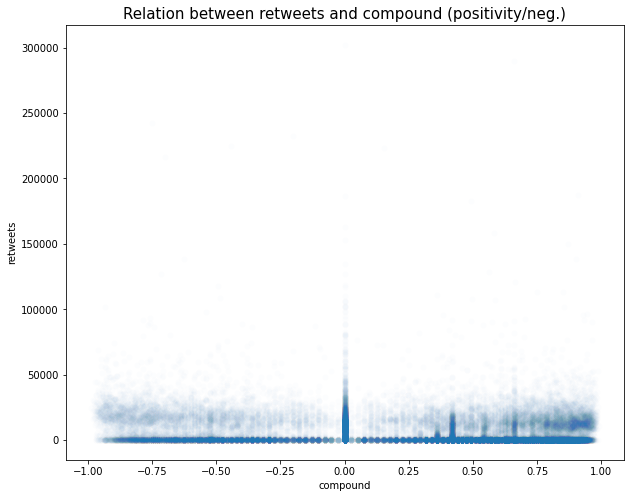

In [206]:
plt.figure(figsize=(10,8))
sns.scatterplot("compound","retweets", data = tweets, alpha = 0.5)
plt.title("Relation between retweets and compound (positivity/neg.)", fontsize = 15)
plt.show()

plt.figure(figsize=(10,8))
sns.scatterplot("compound","retweets", data = tweets, alpha = 0.01)
plt.title("Relation between retweets and compound (positivity/neg.)", fontsize = 15)
plt.show()